In [43]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
temp=pd.read_csv('cpi.csv')
labels=np.array(temp.keys()[3:-2])  #Market basket
print labels
data=np.array(temp.as_matrix())[:, :-2]  #CPIs of the market basket
print data
print np.shape(data)
labels=np.concatenate([labels[:17], labels[18:]])
#Excluding the housing data as some parts of the data is missing
housing_rural=data[0::3, 20]
print housing_rural
print labels
print np.size(labels)
cpis_rural=np.concatenate([data[0::3, 3:20], data[0::3, 21:]], 1)    #Rural CPIs excluding housing
housing_urban=data[1::3, 20]
cpis_urban=np.concatenate([data[1::3, 3:20], data[1::3, 21:]], 1)    #Urban CPIs excluding housing
housing_total=data[2::3, 20]
cpis_total=np.concatenate([data[2::3, 3:20], data[2::3, 21:]], 1)    #Total CPIs excluding housing
gi_rural=data[0::3, -1]
gi_urban=data[1::3, -1]
gi_total=data[2::3, -1]
#print labels
print np.shape(cpis_rural)

['Cereals and products' 'Meat and fish' 'Egg' 'Milk and products'
 'Oils and fats' 'Fruits' 'Vegetables' 'Pulses and products'
 'Sugar and Confectionery' 'Spices' 'Non-alcoholic beverages'
 'Prepared meals, snacks, sweets etc.' 'Food and beverages'
 'Pan, tobacco and intoxicants' 'Clothing' 'Footwear'
 'Clothing and footwear' 'Housing' 'Fuel and light'
 'Household goods and services' 'Health' 'Transport and communication'
 'Recreation and amusement' 'Education' 'Personal care and effects'
 'Miscellaneous' 'General index']
[['Rural' 2013 'January' ... 104.7 104.0 105.1]
 ['Urban' 2013 'January' ... 104.3 103.7 104.0]
 ['Rural+Urban' 2013 'January' ... 104.5 103.9 104.6]
 ...
 ['Rural' 2017 'July' ... 124.4 128.6 136.2]
 ['Urban' 2017 'July' ... 122.4 123.0 131.8]
 ['Rural+Urban' 2017 'July' ... 123.6 125.9 134.2]]
(165, 30)
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan na

In [3]:
print gi_rural

[105.1 105.8 106.0 106.4 107.2 108.9 110.7 112.1 114.2 115.5 117.4 115.5
 114.2 114.0 114.6 115.4 116.0 117.0 119.5 120.7 120.9 121.0 121.1 120.3
 120.3 120.6 121.1 121.5 122.4 124.1 124.7 126.1 127.0 127.7 128.3 127.9
 128.1 127.9 128.0 129.0 130.3 131.9 133.0 133.5 133.4 133.8 133.6 132.8
 132.4 132.6 132.8 132.9 133.3 133.9 136.2]


In [27]:
def pearsonr_matrix(x, axis=0):
    if axis==0:
        l=np.size(x, 1)    #No. of features
        r_pearson=np.empty([l, l])
        for i in range(l-1):
            r_pearson[i, i]=1
            for j in range(i+1, l):
                r_pearson[i, j]=stats.pearsonr(x[:, i], x[:, j])[0]
                r_pearson[j, i]=r_pearson[i, j]
        r_pearson[l-1, l-1]=1
        return r_pearson
    else:
        l=np.size(x, 0)    #No. of features
        r_pearson=np.empty([l, l])
        for i in range(l-1):
            r_pearson[i, i]=1
            for j in range(i+1, l):
                r_pearson[i, j]=stats.pearsonr(x[i, :], x[j, :])[0]
                r_pearson[j, i]=r_pearson[i, j]
        r_pearson[l-1, l-1]=1
        return r_pearson

In [28]:
def kendalltau_matrix(x, axis=0):
    if axis==0:
        l=np.size(x, 1)    #No. of features
        r_kendalltau=np.empty([l, l])
        for i in range(l-1):
            r_kendalltau[i, i]=1
            for j in range(i+1, l):
                r_kendalltau[i, j]=stats.kendalltau(x[:, i], x[:, j])[0]
                r_kendalltau[j, i]=r_kendalltau[i, j]
        r_kendalltau[l-1, l-1]=1
        return r_kendalltau
    else:
        l=np.size(x, 0)    #No. of features
        r_kendalltau=np.empty([l, l])
        for i in range(l-1):
            r_kendalltau[i, i]=1
            for j in range(i+1, l):
                r_kendalltau[i, j]=stats.kendalltau(x[i, :], x[j, :])[0]
                r_kendalltau[j, i]=r_kendalltau[i, j]
        r_kendalltau[l-1, l-1]=1
        return r_kendalltau

In [29]:
#r_rural=(pearsonr_matrix(cpis_rural)+stats.spearmanr(cpis_rural, axis=0)[0]+kendalltau_matrix(cpis_rural))/3
#r_urban=(pearsonr_matrix(cpis_urban)+stats.spearmanr(cpis_urban, axis=0)[0]+kendalltau_matrix(cpis_urban))/3
r_rural=pearsonr_matrix(cpis_rural)
r_urban=pearsonr_matrix(cpis_urban)
r_total=pearsonr_matrix(cpis_total)
print np.shape(r_rural)
r_gi=r_total[-1, :]
print r_total

(26, 26)
[[ 1.          0.95575779  0.87788708  0.97478511  0.92878615  0.91962744
   0.23552269  0.7362914   0.48648992  0.9445645   0.976784    0.97697529
   0.93435721  0.96333863  0.97899617  0.97681695  0.97873135  0.9711755
   0.97660476  0.97109998  0.94340324  0.97735601  0.97317211  0.95089582
   0.98516922  0.97072221]
 [ 0.95575779  1.          0.85032211  0.97199962  0.94830793  0.91707223
   0.26099147  0.82838119  0.46472334  0.97046154  0.98587174  0.98297407
   0.95473278  0.98332356  0.98276062  0.98261961  0.98270785  0.9742817
   0.98432188  0.98397362  0.8760754   0.98499475  0.98443162  0.95995319
   0.98277326  0.98053752]
 [ 0.87788708  0.85032211  1.          0.8434415   0.87370579  0.72777558
   0.19803962  0.7609274   0.47644009  0.87062241  0.86587611  0.86467188
   0.83785874  0.85409608  0.86893077  0.86375914  0.86865138  0.84766742
   0.86469348  0.86475078  0.81852993  0.86709182  0.85802508  0.88550294
   0.87592041  0.86454401]
 [ 0.97478511  0.9719996

In [30]:
#print r_gi
rl=np.concatenate([[labels], [r_gi]]).T
rl=np.flip(rl[rl[:, 1].argsort()], 0)
print rl

[['General index' 1.0]
 ['Education' 0.9912568205840785]
 ['Non-alcoholic beverages' 0.9900227301595778]
 ['Food and beverages' 0.9882330038268973]
 ['Recreation and amusement' 0.9870871303364822]
 ['Footwear' 0.9868458967403686]
 ['Miscellaneous' 0.9866061072661929]
 ['Clothing' 0.9866005558303218]
 ['Clothing and footwear' 0.9864541485437239]
 ['Household goods and services' 0.9861852947241428]
 ['Prepared meals, snacks, sweets etc.' 0.9856495849989851]
 ['Health' 0.9822777711566508]
 ['Milk and products' 0.9817966233661674]
 ['Meat and fish' 0.9805375214402269]
 ['Pan, tobacco and intoxicants' 0.9798501565896492]
 ['Spices' 0.9774393939830922]
 ['Fuel and light' 0.9738930863673176]
 ['Cereals and products' 0.9707222138994255]
 ['Personal care and effects' 0.9542881413183585]
 ['Oils and fats' 0.9462157147812812]
 ['Fruits' 0.9162715938331069]
 ['Transport and communication' 0.8945133489535757]
 ['Egg' 0.8645440051989993]
 ['Pulses and products' 0.8388916647433449]
 ['Sugar and Confe

In [31]:
strong_corr_rural_labels=np.empty(0)
strong_corr_urban_labels=np.empty(0)
strong1_corr_total_labels=np.empty(0)
strong2_corr_total_labels=np.empty(0)
strong3_corr_total_labels=np.empty(0)
strong4_corr_total_labels=np.empty(0)
rz=np.empty(0)
l=np.size(r_total, 0)    #No. of features
for i in range(l-1):
    for j in range(i+1, l):
        #if 1>=r_rural[i, j]>=1-1e-10:
        #    strong_corr_rural_labels=np.append(strong_corr_rural_labels, [labels[i], labels[j]])
        #if 1>=r_urban[i, j]>=1-1e-10:
        #    strong_corr_urban_labels=np.append(strong_corr_urban_labels, [labels[i], labels[j]])
        if r_total[i, j]>=0.9:
            strong1_corr_total_labels=np.append(strong1_corr_total_labels, [labels[i], labels[j]])
        if r_total[i, j]>=0.95:
            strong2_corr_total_labels=np.append(strong2_corr_total_labels, [labels[i], labels[j]])
        if r_total[i, j]>=0.99:
            strong3_corr_total_labels=np.append(strong3_corr_total_labels, [labels[i], labels[j]])
        if r_total[i, j]>=0.999:
            strong4_corr_total_labels=np.append(strong4_corr_total_labels, [labels[i], labels[j]])
            rz=np.append(rz, r_total[i, j])
#strong_corr_rural_labels=np.reshape(strong_corr_rural_labels, [-1, 2])
#print 'The goods and services in the market basket for which the CPIs in the rural sector are strongly correlated are', strong_corr_rural_labels
#np.savetxt('uncorrelated_rural.txt', uncorr_rural_labels, fmt='%28s', delimiter='\t\t')
#strong_corr_urban_labels=np.reshape(strong_corr_urban_labels, [-1, 2])
#np.savetxt('uncorrelated_urban.txt', uncorr_urban_labels, fmt='%28s', delimiter='\t\t')
#print 'The goods and services in the market basket for which the CPIs in the urban sector are strongly correlated are', strong_corr_urban_labels
#strong_corr_total_labels=np.reshape(strong_corr_total_labels, [-1, 2])
#np.savetxt('uncorrelated_total.txt', uncorr_total_labels, fmt='%28s', delimiter='\t\t')
#print 'The goods and services in the market basket for which the total CPIs (rural+urban) are strongly correlated are', strong_corr_total_labels
print np.size(strong1_corr_total_labels)/2
print np.size(strong2_corr_total_labels)/2
print np.size(strong3_corr_total_labels)/2
print np.size(strong4_corr_total_labels)/2
print rz

206
178
70
16
[0.99961764 0.99946272 0.99963367 0.9997638  0.99947174 0.99909566
 0.99976125 0.99998496 0.99970197 0.99949023 0.99978866 0.99950502
 0.9991449  0.99970335 0.99949003 0.99976677]


In [32]:
#print np.size(strong_corr_rural_labels)
#print np.size(strong_corr_urban_labels)
#print np.size(strong_corr_total_labels)
print r_total>=0.95
print np.reshape(strong3_corr_total_labels, [-1, 2])

[[ True  True False  True False False False False False False  True  True
  False  True  True  True  True  True  True  True False  True  True  True
   True  True]
 [ True  True False  True False False False False False  True  True  True
   True  True  True  True  True  True  True  True False  True  True  True
   True  True]
 [False False  True False False False False False False False False False
  False False False False False False False False False False False False
  False False]
 [ True  True False  True False False False False False  True  True  True
   True  True  True  True  True  True  True  True False  True  True False
   True  True]
 [False False False False  True False False False False  True  True  True
  False  True  True  True  True  True  True  True False  True  True  True
   True False]
 [False False False False False  True False False False False False False
  False False False False False False False False False False False False
  False False]
 [False False False Fa

1. Milk and products, Prepared meals, snacks, sweets etc., Clothing, Footwear, Clothing and footwear
2. Non-alcoholic beverages, Prepared meals, snacks, sweets etc., Clothing, Footwear, Clothing and footwear, Pan, tobacco and intoxicants, Fuel and light, Household goods and services, Health, Recreation and amusement
 ['Non-alcoholic beverages' 'Education']
 ['Non-alcoholic beverages' 'Miscellaneous']
 ['Non-alcoholic beverages' 'General index']
 ['Prepared meals, snacks, sweets etc.' 'Education']
 ['Prepared meals, snacks, sweets etc.' 'Miscellaneous']
 ['Pan, tobacco and intoxicants' 'Education']
 ['Pan, tobacco and intoxicants' 'Miscellaneous']
 ['Clothing' 'Education']
 ['Clothing' 'Miscellaneous']
 ['Footwear' 'Clothing and footwear']
 ['Footwear' 'Education']
 ['Footwear' 'Miscellaneous']
 ['Clothing and footwear' 'Education']
 ['Clothing and footwear' 'Miscellaneous']
 ['Household goods and services' 'Recreation and amusement']
 ['Household goods and services' 'Education']
 ['Household goods and services' 'Miscellaneous']
 ['Health' 'Education']
 ['Health' 'Miscellaneous']
 ['Recreation and amusement' 'Education']
 ['Recreation and amusement' 'Miscellaneous']
 ['Education' 'Miscellaneous']
 ['Education' 'General index']]


In [33]:
def combine_clusters(x):
    

IndentationError: expected an indented block (<ipython-input-33-6cd8a79fae24>, line 2)

In [34]:
#print np.size(strong_corr_rural_labels)
#print np.size(strong_corr_urban_labels)
#print np.size(strong_corr_total_labels)
print np.reshape(strong4_corr_total_labels, [-1, 2])

[['Prepared meals, snacks, sweets etc.' 'Clothing']
 ['Prepared meals, snacks, sweets etc.' 'Footwear']
 ['Prepared meals, snacks, sweets etc.' 'Clothing and footwear']
 ['Prepared meals, snacks, sweets etc.' 'Household goods and services']
 ['Prepared meals, snacks, sweets etc.' 'Recreation and amusement']
 ['Pan, tobacco and intoxicants' 'Health']
 ['Clothing' 'Footwear']
 ['Clothing' 'Clothing and footwear']
 ['Clothing' 'Household goods and services']
 ['Clothing' 'Recreation and amusement']
 ['Footwear' 'Clothing and footwear']
 ['Footwear' 'Household goods and services']
 ['Footwear' 'Recreation and amusement']
 ['Clothing and footwear' 'Household goods and services']
 ['Clothing and footwear' 'Recreation and amusement']
 ['Household goods and services' 'Recreation and amusement']]


Observations:
1. Pan, tobacco and intoxicants and Household goods and services are very highly correlated.
2. Prepared meals, snacks, sweets etc., Clothing, Footwear, Fuel and light and Recreation and amusement are mutually very highly correlated.

In [35]:
print r_gi

[0.97072221 0.98053752 0.86454401 0.98179662 0.94621571 0.91627159
 0.36821192 0.83889166 0.42075704 0.97743939 0.99002273 0.98564958
 0.988233   0.97985016 0.98660056 0.9868459  0.98645415 0.97389309
 0.98618529 0.98227777 0.89451335 0.98708713 0.99125682 0.95428814
 0.98660611 1.        ]


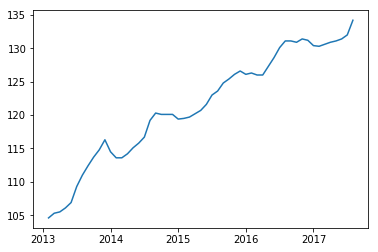

In [36]:
plt.plot(np.linspace(2013+1.0/12, 2017+7.0/12, 55), gi_total)

In [14]:
print gi_total

[104.6 105.3 105.5 106.1 106.9 109.3 111.0 112.4 113.7 114.8 116.3 114.5
 113.6 113.6 114.2 115.1 115.8 116.7 119.2 120.3 120.1 120.1 120.1 119.4
 119.5 119.7 120.2 120.7 121.6 123.0 123.6 124.8 125.4 126.1 126.6 126.1
 126.3 126.0 126.0 127.3 128.6 130.1 131.1 131.1 130.9 131.4 131.2 130.4
 130.3 130.6 130.9 131.1 131.4 132.0 134.2]


[0.47909091 0.72636364 0.39545455 0.62818182 0.23909091 0.72909091
 1.28909091 0.47181818 0.25818182 0.59090909 0.44090909 0.71727273
 0.65090909 0.80454545 0.61272727 0.49181818 0.59636364 0.44454545
 0.50272727 0.47454545 0.23727273 0.43818182 0.61909091 0.34909091
 0.40818182 0.56454545]
[3 4 3 0 1 4 2 3 1 0 3 4 0 4 0 3 0 3 3 3 1 3 0 1 3 0]
(26,)
Cluster 1:
['Milk and products' 'Spices' 'Food and beverages' 'Clothing'
 'Clothing and footwear' 'Education' 'General index']
Cluster 2:
['Oils and fats' 'Sugar and Confectionery' 'Transport and communication'
 'Personal care and effects']
Cluster 3:
['Vegetables']
Cluster 4:
['Cereals and products' 'Egg' 'Pulses and products'
 'Non-alcoholic beverages' 'Footwear' 'Fuel and light'
 'Household goods and services' 'Health' 'Recreation and amusement'
 'Miscellaneous']
Cluster 5:
['Meat and fish' 'Fruits' 'Prepared meals, snacks, sweets etc.'
 'Pan, tobacco and intoxicants']
[['Food and beverages' 0.6509090909090911 0]
 ['Education' 0.61909090

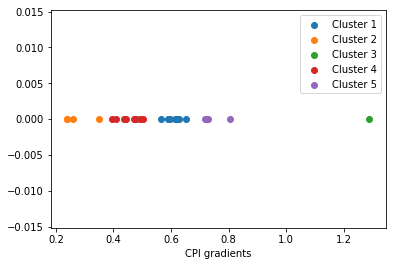

In [90]:
#Gradient analysis
grad_cpis_total=np.mean(np.gradient(cpis_total)[0], 0).reshape(-1, 1)
print np.ndarray.flatten(grad_cpis_total)

kmeans_grad=KMeans(n_clusters=5, random_state=0).fit(grad_cpis_total)
kmeans_grad_labels=kmeans_grad.labels_
print kmeans_grad_labels
print np.shape(kmeans_grad_labels)
#kmeans_grad.cluster_centers_
ind_grad_labels_C0=np.where(kmeans_grad_labels==0)
ind_grad_labels_C1=np.where(kmeans_grad_labels==1)
ind_grad_labels_C2=np.where(kmeans_grad_labels==2)
ind_grad_labels_C3=np.where(kmeans_grad_labels==3)
ind_grad_labels_C4=np.where(kmeans_grad_labels==4)
print 'Cluster 1:'
print labels[ind_grad_labels_C0]
print 'Cluster 2:'
print labels[ind_grad_labels_C1]
print 'Cluster 3:'
print labels[ind_grad_labels_C2]
print 'Cluster 4:'
print labels[ind_grad_labels_C3]
print 'Cluster 5:'
print labels[ind_grad_labels_C4]


temp=np.concatenate([[labels], [np.ndarray.flatten(grad_cpis_total)], [kmeans_grad_labels]]).T
temp=temp[temp[:, 2].argsort()]
print temp

grad_cpis_total_C0=grad_cpis_total[ind_grad_labels_C0]
grad_cpis_total_C1=grad_cpis_total[ind_grad_labels_C1]
grad_cpis_total_C2=grad_cpis_total[ind_grad_labels_C2]
grad_cpis_total_C3=grad_cpis_total[ind_grad_labels_C3]
grad_cpis_total_C4=grad_cpis_total[ind_grad_labels_C4]

plt.scatter(grad_cpis_total_C0, np.zeros(np.size(ind_grad_labels_C0)))
plt.scatter(grad_cpis_total_C1, np.zeros(np.size(ind_grad_labels_C1)))
plt.scatter(grad_cpis_total_C2, np.zeros(np.size(ind_grad_labels_C2)))
plt.scatter(grad_cpis_total_C3, np.zeros(np.size(ind_grad_labels_C3)))
plt.scatter(grad_cpis_total_C4, np.zeros(np.size(ind_grad_labels_C4)))
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.xlabel('CPI gradients')
plt.show()

We have found the time gradient of the CPIs of each item (in units of /month), and we have clustered the data into 5 clusters. 

[-3.59090909e-02 -8.13636364e-02 -4.50000000e-02 -3.18181818e-03
 -1.45454545e-02  5.18181818e-02  5.33181818e-01 -3.50000000e-02
  4.04545455e-02 -4.54545455e-04  4.54545455e-03 -1.36363636e-03
  5.81818182e-02  2.77272727e-02  5.45454545e-03 -1.36363636e-03
  5.45454545e-03  5.45454545e-03  7.27272727e-03  1.04545455e-02
 -2.90909091e-02  4.09090909e-03  2.27272727e-02  1.81818182e-03
 -1.81818182e-03  3.22727273e-02]


"kmeans_grad2=KMeans(n_clusters=5, random_state=0).fit(grad2_cpis_total)\nkmeans_grad2_labels=kmeans_grad2.labels_\nprint kmeans_grad2_labels\nprint kmeans_grad2.cluster_centers_\nplt.scatter(kmeans_grad2_cpis_total, np.zeros(l-1))\ngrad2_cpis_total_C0=grad2_cpis_total[np.where(kmeans_grad2_labels==0)]\ngrad2_cpis_total_C1=grad2_cpis_total[np.where(kmeans_grad2_labels==1)]\ngrad2_cpis_total_C2=grad2_cpis_total[np.where(kmeans_grad2_labels==2)]\ngrad2_cpis_total_C3=grad2_cpis_total[np.where(kmeans_grad2_labels==3)]\ngrad2_cpis_total_C4=grad2_cpis_total[np.where(kmeans_grad2_labels==4)]\n#colors=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']\nplt.figure(0)\nplt.scatter(grad2_cpis_total_C0, np.zeros(np.size(grad2_cpis_total_C0)))\nplt.scatter(grad2_cpis_total_C1, np.zeros(np.size(grad2_cpis_total_C1)))\nplt.scatter(grad2_cpis_total_C2, np.zeros(np.size(grad2_cpis_total_C2)))\nplt.scatter(grad2_cpis_total_C3, np.zeros(np.size(grad2_cpis_total_C3)))\nplt.scatter(grad2_cpis_tot

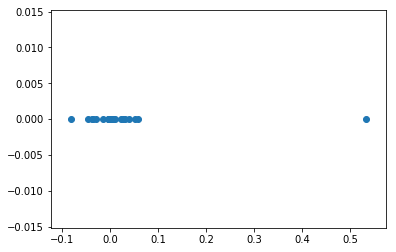

In [78]:
#kmeans_grad2=KMeans??
#Double grad2ient
grad2_cpis_total=np.mean(np.gradient(np.gradient(cpis_total)[0])[0], 0).reshape(-1, 1)
print np.ndarray.flatten(grad2_cpis_total)
plt.scatter(grad2_cpis_total, np.zeros(l))
'''kmeans_grad2=KMeans(n_clusters=5, random_state=0).fit(grad2_cpis_total)
kmeans_grad2_labels=kmeans_grad2.labels_
print kmeans_grad2_labels
print kmeans_grad2.cluster_centers_
plt.scatter(kmeans_grad2_cpis_total, np.zeros(l-1))
grad2_cpis_total_C0=grad2_cpis_total[np.where(kmeans_grad2_labels==0)]
grad2_cpis_total_C1=grad2_cpis_total[np.where(kmeans_grad2_labels==1)]
grad2_cpis_total_C2=grad2_cpis_total[np.where(kmeans_grad2_labels==2)]
grad2_cpis_total_C3=grad2_cpis_total[np.where(kmeans_grad2_labels==3)]
grad2_cpis_total_C4=grad2_cpis_total[np.where(kmeans_grad2_labels==4)]
#colors=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
plt.figure(0)
plt.scatter(grad2_cpis_total_C0, np.zeros(np.size(grad2_cpis_total_C0)))
plt.scatter(grad2_cpis_total_C1, np.zeros(np.size(grad2_cpis_total_C1)))
plt.scatter(grad2_cpis_total_C2, np.zeros(np.size(grad2_cpis_total_C2)))
plt.scatter(grad2_cpis_total_C3, np.zeros(np.size(grad2_cpis_total_C3)))
plt.scatter(grad2_cpis_total_C4, np.zeros(np.size(grad2_cpis_total_C4)))

plt.show()'''

In [ ]:
kmeans_grad=KMeans